In [36]:
from numpy.random import seed
from numpy.random import normal

#make this example reproducible
seed(1)

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [159]:
def generate_data(sample_size = 200, mean = 250,uplift = 0.5):
  """
  uplift - in percantages
  """
  a_sample = normal(loc=mean, scale=10, size=sample_size)
  b_sample = normal(loc=mean + (mean/100*uplift), scale=10, size=sample_size)
  return a_sample, b_sample

In [160]:
def get_ttest_res(a_sample, b_sample, alpha = 0.05):
  _, p_val = ttest_ind(a_sample, b_sample)
  return round(p_val, 10)

In [198]:
def generate_n_ab(n = 1000, sample_size = 200, uplift = 0.5):
  p_value_list = []
  sign = 0
  for i in range(1000):
    sample_size
    a_sample, b_sample = generate_data(sample_size = sample_size, uplift = uplift)
    p_value_list.append(get_ttest_res(a_sample, b_sample))
    if get_ttest_res(a_sample, b_sample) < 0.05:
      sign +=1
  power = sign/len(p_value_list)

  plt.hist(p_value_list, bins = 200)
  plt.title(f"""P-value distr 
  for {sample_size} sample_size and uplift = {uplift}""")
  plt.show()
  print('power = ',power)


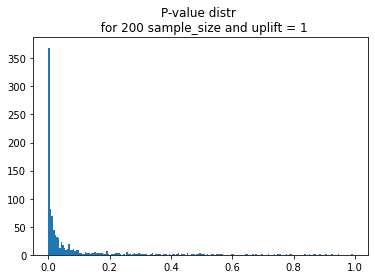

power =  0.719


In [199]:
#try to calculate power with 200 sammple size
generate_n_ab(sample_size = 200, uplift = 1)

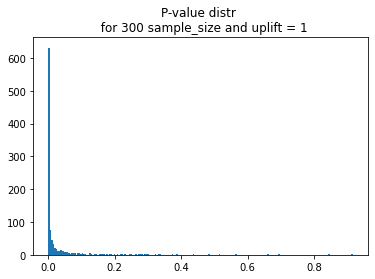

power =  0.884


In [200]:
# as we got not enough power then we:
# either increase sample_size
#try to calculate power with 200 sammple size
generate_n_ab(sample_size = 300, uplift = 1)

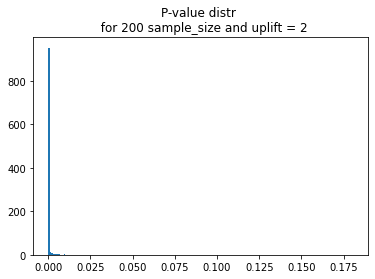

power =  0.998


In [201]:
#or increase uplift (MDE)
generate_n_ab(sample_size = 200, uplift = 2)